<a href="https://colab.research.google.com/github/Varad2510/CodeAlpha_Disease_Predicton_Model/blob/main/Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0    Influenza   Yes    No     Yes                  Yes   19  Female   
1  Common Cold    No   Yes     Yes                   No   25  Female   
2       Eczema    No   Yes     Yes                   No   25  Female   
3       Asthma   Yes   Yes      No                  Yes   25    Male   
4       Asthma   Yes   Yes      No                  Yes   25    Male   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2         Normal            Normal         Negative  
3         Normal            Normal         Positive  
4         Normal            Normal         Positive  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Colu

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

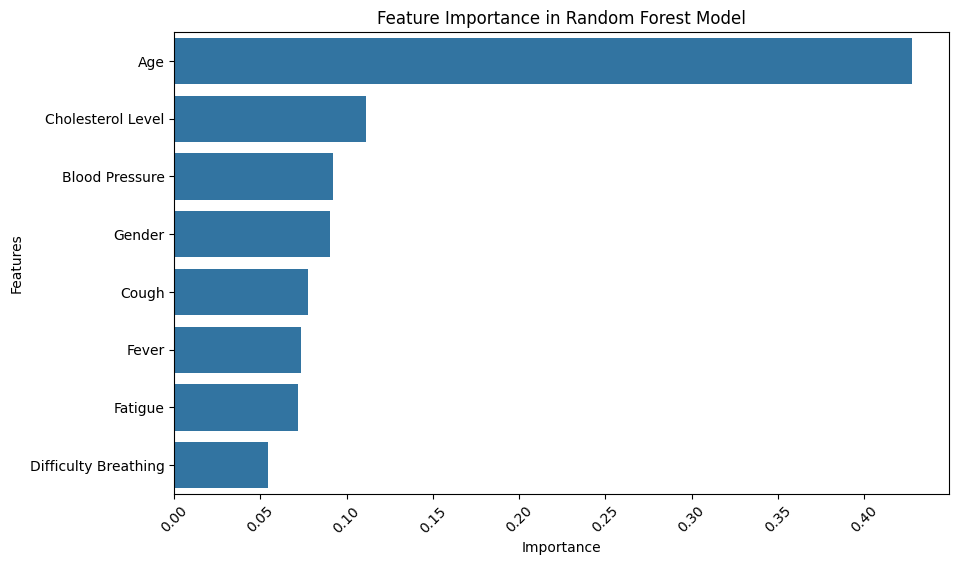

hi


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib  # For saving and loading the model

# If you're working in Google Colab, uncomment and run this:
from google.colab import drive
drive.mount('/content/drive')

# Assuming the dataset is in the same directory or a specific path
file_path = '/content/drive/My Drive/Disease_dataset.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Handle Missing Values (if any)
# Example:
# data['Age'].fillna(data['Age'].mean(), inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['Disease'] = le.fit_transform(data['Disease'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Blood Pressure'] = le.fit_transform(data['Blood Pressure'])
data['Cholesterol Level'] = le.fit_transform(data['Cholesterol Level'])
data['Fever'] = le.fit_transform(data['Fever'])
data['Cough'] = le.fit_transform(data['Cough'])
data['Fatigue'] = le.fit_transform(data['Fatigue'])
data['Difficulty Breathing'] = le.fit_transform(data['Difficulty Breathing'])

# Separate features and target variable
X = data[['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']]
y = data['Disease']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Logistic Regression
logreg_pred = logreg_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logreg_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, logreg_pred))

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))

# Save the best-performing model (e.g., Random Forest)
joblib.dump(rf_model, 'disease_prediction_model.pkl')

# Load the saved model
loaded_model = joblib.load('disease_prediction_model.pkl')

# Example: Make a prediction on new data (assuming new_data has the same features as X)
new_data = [[30, 1, 1, 0, 0, 1, 0, 0]]  # Example of new data
prediction = loaded_model.predict(new_data)
print("Predicted Disease:", prediction)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your trained model is stored in 'rf_model'
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
df_importance = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importance)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

